In [56]:
# from alpha_vantage.timeseries import TimeSeries
# from alpha_vantage.techindicators import TechIndicators
# from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd


In [57]:
stocks_df=pd.read_csv("500_stock_export.csv")
stocks_df=pd.DataFrame(stocks_df)
stocks_df.head(10)


,Unnamed: 0,Symbol,Name,Sector,2019-10-04,2019-10-11,2019-10-18,2019-10-25,2019-11-01,2019-11-08,...,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13,Difference
0,0,MMM,3M Company,Industrials,155.82,158.10,163.10,166.09,170.09,173.15,...,181.35,178.15,158.66,160.08,161.01,156.930,149.24,153.65,141.68,14.14
1,1,AOS,A.O. Smith Corp,Industrials,45.51,47.99,51.01,51.07,50.28,52.08,...,46.93,45.43,42.69,41.99,43.93,44.090,39.55,42.69,41.49,4.02
2,2,ABT,Abbott Laboratories,Health Care,81.99,79.63,82.79,81.65,82.66,83.74,...,89.00,90.40,87.14,87.87,89.66,87.450,77.03,81.74,81.65,0.34
3,3,ABBV,AbbVie Inc.,Health Care,74.66,73.63,76.46,76.53,81.75,85.21,...,88.00,83.54,81.02,92.29,94.05,94.960,85.71,88.82,85.37,-10.71
4,4,ACN,Accenture plc,Information Technology,189.64,184.97,187.08,183.07,188.22,189.70,...,209.20,208.57,205.21,211.58,212.37,211.890,180.59,178.75,166.51,23.13
5,5,ATVI,Activision Blizzard,Information Technology,55.44,54.82,54.54,55.26,55.82,54.30,...,61.24,59.40,58.48,61.53,63.52,63.375,58.13,59.97,59.04,-3.60
6,6,AYI,Acuity Brands Inc,Industrials,121.15,122.02,122.93,124.90,125.99,128.08,...,123.28,121.49,117.87,117.70,116.90,115.700,102.86,103.05,95.68,25.47
7,7,ADBE,Adobe Systems Inc,Information Technology,276.96,278.29,265.52,270.98,277.82,292.46,...,349.74,351.37,351.14,366.09,379.67,372.950,345.12,336.77,335.50,-58.54
8,8,AAP,Advance Auto Parts,Consumer Discretionary,159.94,158.56,163.50,165.56,164.82,167.40,...,151.05,141.68,131.75,132.93,133.59,140.610,132.98,127.91,113.69,46.25
9,9,AMD,Advanced Micro Devices Inc,Information Technology,29.01,29.75,30.97,32.71,34.89,36.29,...,50.93,50.35,47.00,49.73,55.31,53.280,45.48,48.59,43.90,-14.89


In [58]:
date_df=stocks_df.set_index(['Symbol'])
date_df=date_df.dropna()
date_df=date_df.drop(['Unnamed: 0','Sector', 'Name'], axis=1)
date_df.head()

,2019-10-04,2019-10-11,2019-10-18,2019-10-25,2019-11-01,2019-11-08,2019-11-15,2019-11-22,2019-11-29,2019-12-06,...,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13,Difference
Symbol,,,,,,,,,,,,,,,,,,,,,
MMM,155.82,158.10,163.10,166.09,170.09,173.15,171.88,167.60,169.77,171.47,...,181.35,178.15,158.66,160.08,161.01,156.93,149.24,153.65,141.68,14.14
AOS,45.51,47.99,51.01,51.07,50.28,52.08,50.78,48.20,48.40,46.79,...,46.93,45.43,42.69,41.99,43.93,44.09,39.55,42.69,41.49,4.02
ABT,81.99,79.63,82.79,81.65,82.66,83.74,85.71,83.74,85.45,85.48,...,89.00,90.40,87.14,87.87,89.66,87.45,77.03,81.74,81.65,0.34
ABBV,74.66,73.63,76.46,76.53,81.75,85.21,88.63,86.05,87.73,86.98,...,88.00,83.54,81.02,92.29,94.05,94.96,85.71,88.82,85.37,-10.71
ACN,189.64,184.97,187.08,183.07,188.22,189.70,196.81,196.66,201.16,202.55,...,209.20,208.57,205.21,211.58,212.37,211.89,180.59,178.75,166.51,23.13


In [59]:
date_df=date_df.swapaxes("index", "columns") 
date_df=date_df.reset_index()
date_df=date_df.rename(columns={"index": "date_range"})
date_df

Symbol,date_range,MMM,AOS,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
0,2019-10-04,155.82,45.51,81.99,74.66,189.64,55.440,121.15,276.96,159.94,...,188.65,108.91,64.630,29.59,94.24,75.97,114.66,134.45,43.200,127.05
1,2019-10-11,158.10,47.99,79.63,73.63,184.97,54.820,122.02,278.29,158.56,...,188.10,112.78,63.330,29.41,96.22,77.63,114.45,136.44,44.090,128.47
2,2019-10-18,163.10,51.01,82.79,76.46,187.08,54.540,122.93,265.52,163.50,...,187.77,113.52,64.010,29.80,94.34,79.78,112.30,137.61,44.720,128.12
3,2019-10-25,166.09,51.07,81.65,76.53,183.07,55.260,124.90,270.98,165.56,...,184.98,120.85,63.640,30.51,94.90,83.30,109.10,134.07,47.950,124.36
4,2019-11-01,170.09,50.28,82.66,81.75,188.22,55.820,125.99,277.82,164.82,...,188.99,123.19,63.100,33.48,92.71,79.12,99.65,138.22,49.345,125.34
5,2019-11-08,173.15,52.08,83.74,85.21,189.70,54.300,128.08,292.46,167.40,...,185.10,126.47,60.080,38.85,95.50,77.33,98.90,144.00,51.070,117.86
6,2019-11-15,171.88,50.78,85.71,88.63,196.81,53.440,128.38,297.50,162.66,...,188.95,117.70,60.870,38.94,93.66,77.55,98.28,146.78,49.550,117.92
7,2019-11-22,167.60,48.20,83.74,86.05,196.66,53.040,127.31,299.30,157.87,...,189.76,119.16,61.260,39.06,90.61,76.89,97.62,143.82,49.960,119.81
8,2019-11-29,169.77,48.40,85.45,87.73,201.16,54.830,130.78,309.53,157.08,...,196.44,120.85,61.490,38.93,92.78,77.51,100.67,145.28,49.780,120.52
9,2019-12-06,171.47,46.79,85.48,86.98,202.55,55.210,133.80,306.23,154.62,...,195.39,121.68,62.000,37.77,91.86,75.32,98.77,148.53,49.710,121.72


In [60]:
date = date_df.index.astype('O')

In [61]:
symbols = list(date_df.iloc[0])
difference = list(date_df.iloc[-1])

In [62]:
difference_df = pd.DataFrame({'Symbols' : symbols,
                                'Difference' : difference})
difference_df

,Symbols,Difference
0,2019-10-04,Difference
1,155.82,14.14
2,45.51,4.02
3,81.99,0.34
4,74.66,-10.71
...,...,...
462,75.97,3.85
463,114.66,36.2
464,134.45,36.65
465,43.2,13.78


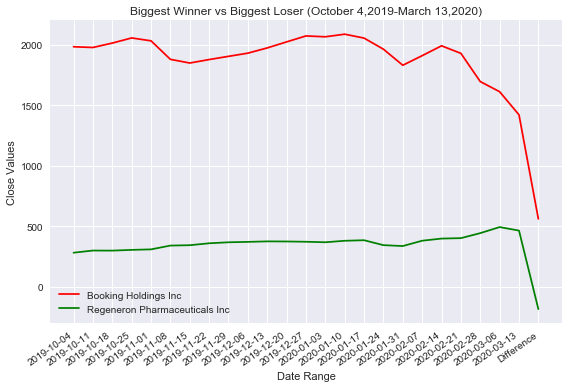

In [63]:
x=date_df["date_range"]
big_loser=date_df["BKNG"]
big_winner=date_df["REGN"]
fig, ax=plt.subplots()
ax.plot(x,big_loser, label="Booking Holdings Inc", color="red")
ax.plot(x,big_winner, label="Regeneron Pharmaceuticals Inc", color="green");
plt.title("Biggest Winner vs Biggest Loser (October 4,2019-March 13,2020)")
plt.xlabel("Date Range")
plt.ylabel("Close Values")
for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(35)
plt.style.use('seaborn')
plt.legend(loc="best")
plt.tight_layout()
plt.savefig("bigwinvsbiglose.png")
plt.show()

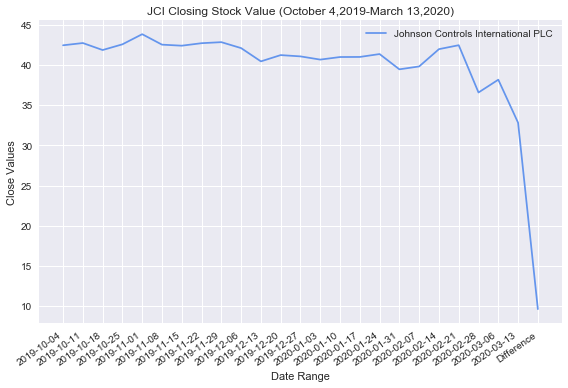

In [64]:
x=date_df["date_range"]
median=date_df["JCI"]
fig, ax=plt.subplots()
ax.plot(x,median, label="Johnson Controls International PLC", color="cornflowerblue");
plt.title("JCI Closing Stock Value (October 4,2019-March 13,2020)")
plt.xlabel("Date Range")
plt.ylabel("Close Values")
for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(35)
plt.style.use('seaborn')
plt.legend(loc="best")
plt.tight_layout()
plt.savefig("medianstock_jci.png")
plt.show()

In [65]:
cleaned_stocks=stocks_df.dropna()
cleaned_stocks=cleaned_stocks.drop(['Unnamed: 0'], axis=1)
sector_df=cleaned_stocks.groupby("Sector").mean()
sector_df["Difference"]=sector_df["2020-03-13"] - sector_df["2019-10-04"]
sector_df.head()

,2019-10-04,2019-10-11,2019-10-18,2019-10-25,2019-11-01,2019-11-08,2019-11-15,2019-11-22,2019-11-29,2019-12-06,...,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13,Difference
Sector,,,,,,,,,,,,,,,,,,,,,
Consumer Discretionary,150.975779,152.346623,154.383571,155.682468,156.319610,154.446039,153.821948,153.502597,156.032727,156.328571,...,163.047078,159.644675,156.404481,159.324675,163.335455,161.617273,143.750649,140.200130,124.656039,-26.319740
Consumer Staples,92.192167,91.533667,91.195833,90.782000,90.512667,90.793333,91.333333,91.538333,92.429333,93.057833,...,95.707667,95.204500,93.748000,95.787500,96.808333,96.178667,85.963000,91.549000,83.497333,-8.694833
Energy,46.462593,47.197778,46.100741,48.623333,48.590000,49.938148,49.339259,48.618148,47.780741,48.567407,...,51.454074,48.728519,45.801852,46.324074,46.590000,46.731481,39.348519,35.187407,25.294074,-21.168519
Financials,92.388333,92.811905,93.571905,94.597302,96.402143,98.492698,98.666349,98.798889,99.663651,100.096667,...,103.739683,102.195873,101.173016,104.230635,105.766667,104.361270,89.908095,87.252381,77.146984,-15.241349
Health Care,155.743909,155.795818,159.419000,160.992273,165.174000,165.438364,169.808273,171.283818,173.360545,175.027636,...,184.018545,180.328545,172.708182,179.960182,183.956182,183.118909,164.644727,170.859636,156.790364,1.046455


In [66]:
max_diff=sector_df[sector_df['Difference']==sector_df['Difference'].max()]
min_diff=sector_df[sector_df['Difference']==sector_df['Difference'].min()]
median_diff=sector_df[sector_df['Difference']==sector_df['Difference'].median()]
max_diff

,2019-10-04,2019-10-11,2019-10-18,2019-10-25,2019-11-01,2019-11-08,2019-11-15,2019-11-22,2019-11-29,2019-12-06,...,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13,Difference
Sector,,,,,,,,,,,,,,,,,,,,,
Health Care,155.743909,155.795818,159.419,160.992273,165.174,165.438364,169.808273,171.283818,173.360545,175.027636,...,184.018545,180.328545,172.708182,179.960182,183.956182,183.118909,164.644727,170.859636,156.790364,1.046455


In [67]:
min_diff

,2019-10-04,2019-10-11,2019-10-18,2019-10-25,2019-11-01,2019-11-08,2019-11-15,2019-11-22,2019-11-29,2019-12-06,...,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13,Difference
Sector,,,,,,,,,,,,,,,,,,,,,
Consumer Discretionary,150.975779,152.346623,154.383571,155.682468,156.31961,154.446039,153.821948,153.502597,156.032727,156.328571,...,163.047078,159.644675,156.404481,159.324675,163.335455,161.617273,143.750649,140.20013,124.656039,-26.31974


In [68]:
median_diff

,2019-10-04,2019-10-11,2019-10-18,2019-10-25,2019-11-01,2019-11-08,2019-11-15,2019-11-22,2019-11-29,2019-12-06,...,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13,Difference
Sector,,,,,,,,,,,,,,,,,,,,,
Real Estate,122.095312,121.18875,122.807813,121.790313,120.881562,116.390625,118.725,117.30375,118.85625,118.557187,...,121.672812,122.815781,121.121875,123.436875,129.334688,129.368437,113.829688,119.804688,111.36375,-10.731562


In [69]:
sector_df=sector_df.swapaxes("index", "columns") 
sector_df=sector_df.rename(index={'Sector': 'date_range'})
sector_df.index.name = 'date_range'
sector_df.head()

Sector,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Telecommunication Services,Utilities
date_range,,,,,,,,,,,
2019-10-04,150.975779,92.192167,46.462593,92.388333,155.743909,123.872109,147.868881,112.417273,122.095312,36.316667,81.083846
2019-10-11,152.346623,91.533667,47.197778,92.811905,155.795818,125.941797,149.027015,114.131818,121.188750,36.413333,79.808654
2019-10-18,154.383571,91.195833,46.100741,93.571905,159.419000,126.794375,148.894179,114.520000,122.807813,37.320000,79.692885
2019-10-25,155.682468,90.782000,48.623333,94.597302,160.992273,129.086953,151.500522,116.207273,121.790313,36.723333,79.938462
2019-11-01,156.319610,90.512667,48.590000,96.402143,165.174000,130.892656,153.646119,117.130455,120.881562,37.546667,79.784615


In [70]:
df=sector_df.reset_index()

In [73]:
for x in range(1, len(df.columns)):
    sector = df.columns[x]
    diffs = [0]
    percentDiffs = [0]
    for rowNum in range(1,len(df)-1):
        before = df.iloc[rowNum-1,x]
        after = df.iloc[rowNum,x]
        diff = after - before
        value = diff/before
        diffs.append(diff)
        percentDiffs.append(value * 100)
    diffs.append(0)
    percentDiffs.append(0)
    df[sector + " " + "Diff"] = diffs
    df[sector + " " + "Percent Change"] = percentDiffs

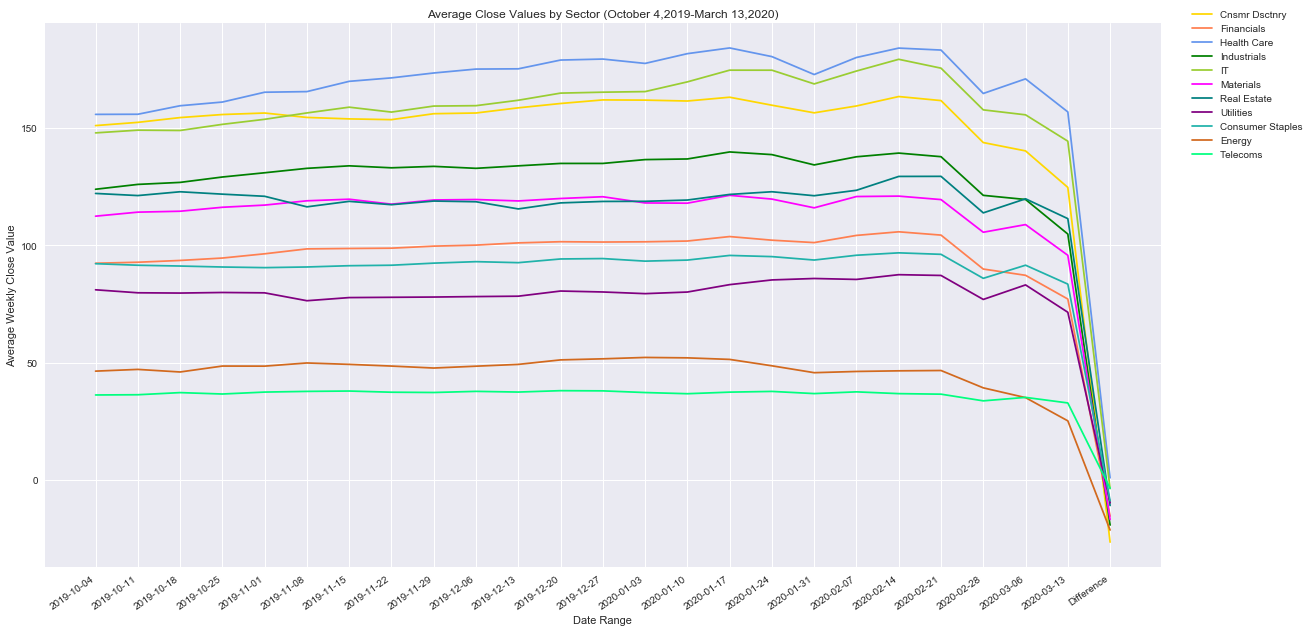

In [80]:
x_axis=df["date_range"]
y_1=df["Consumer Discretionary"]
y_2=df["Financials"]
y_3=df["Health Care"]
y_4=df["Industrials"]
y_5=df["Information Technology"]
y_6=df["Materials"]
y_7=df["Real Estate"]
y_8=df["Utilities"]
y_9=df["Consumer Staples"]
y_10=df["Energy"]
y_11=df["Telecommunication Services"]
fig,ax=plt.subplots()
consumer_discretionary=plt.plot(x_axis, y_1, label="Cnsmr Dsctnry", color="gold")
fin=plt.plot(x_axis, y_2, label="Financials", color="coral")
hc=plt.plot(x_axis, y_3, label="Health Care", color="cornflowerblue")
ind=plt.plot(x_axis, y_4, label="Industrials", color="green")
it=plt.plot(x_axis, y_5, label="IT", color="yellowgreen")
mat=plt.plot(x_axis, y_6, label="Materials", color="magenta")
re=plt.plot(x_axis, y_7, label="Real Estate",color="teal")
ut=plt.plot(x_axis, y_8, label="Utilities", color="purple")
constaple=plt.plot(x_axis, y_9, label="Consumer Staples", color="lightseagreen")
energy=plt.plot(x_axis, y_10, label="Energy", color="chocolate")
telecom=plt.plot(x_axis, y_11, label="Telecoms", color="springgreen")
for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(35)
plt.style.use('seaborn')
plt.legend(bbox_to_anchor=(1.02, 1.04))
plt.title("Average Close Values by Sector (October 4,2019-March 13,2020)")
plt.xlabel("Date Range")
plt.ylabel("Average Weekly Close Value")
print_fig = fig
print_fig.set_size_inches(20,10)
print_fig.savefig('Avgclose_bysector.png')
plt.show()


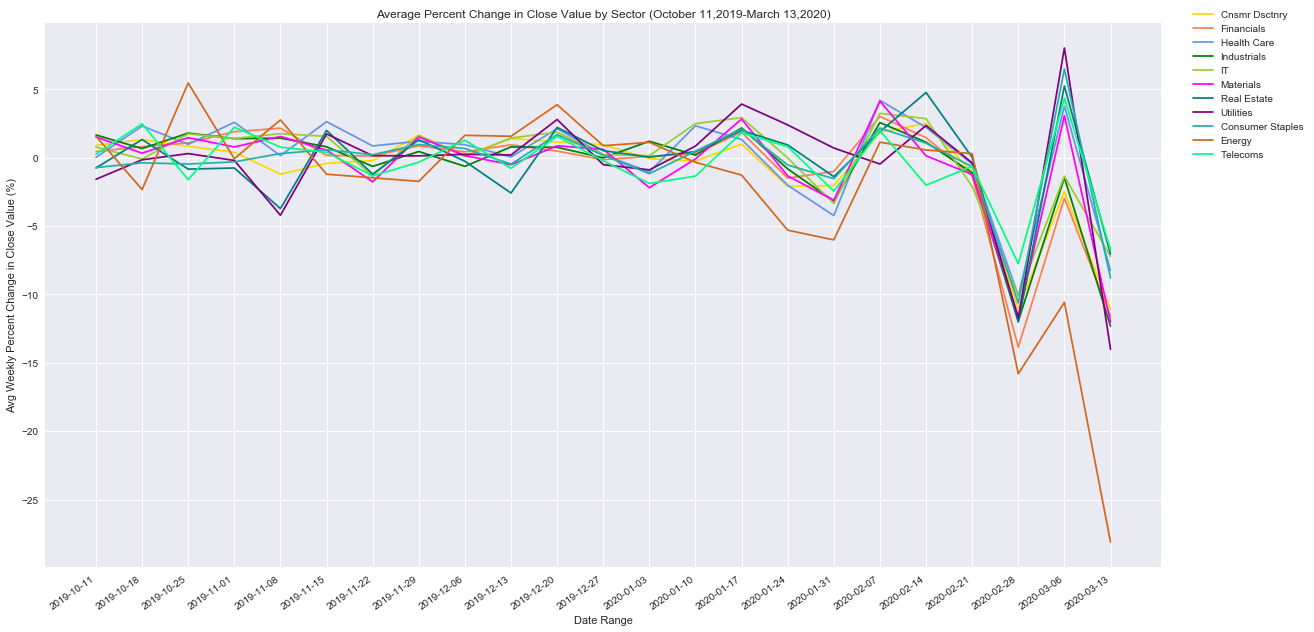

In [84]:
x_axis=df["date_range"][1:-1]
y_1=df["Consumer Discretionary Percent Change"][1:-1]
y_2=df["Financials Percent Change"][1:-1]
y_3=df["Health Care Percent Change"][1:-1]
y_4=df["Industrials Percent Change"][1:-1]
y_5=df["Information Technology Percent Change"][1:-1]
y_6=df["Materials Percent Change"][1:-1]
y_7=df["Real Estate Percent Change"][1:-1]
y_8=df["Utilities Percent Change"][1:-1]
y_9=df["Consumer Staples Percent Change"][1:-1]
y_10=df["Energy Percent Change"][1:-1]
y_11=df["Telecommunication Services Percent Change"][1:-1]
fig,ax=plt.subplots()
consumer_discretionary=plt.plot(x_axis, y_1, label="Cnsmr Dsctnry", color="gold")
fin=plt.plot(x_axis, y_2, label="Financials", color="coral")
hc=plt.plot(x_axis, y_3, label="Health Care", color="cornflowerblue")
ind=plt.plot(x_axis, y_4, label="Industrials", color="green")
it=plt.plot(x_axis, y_5, label="IT", color="yellowgreen")
mat=plt.plot(x_axis, y_6, label="Materials", color="magenta")
re=plt.plot(x_axis, y_7, label="Real Estate",color="teal")
ut=plt.plot(x_axis, y_8, label="Utilities", color="purple")
constaple=plt.plot(x_axis, y_9, label="Consumer Staples", color="lightseagreen")
energy=plt.plot(x_axis, y_10, label="Energy", color="chocolate")
telecom=plt.plot(x_axis, y_11, label="Telecoms", color="springgreen")
for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(35)
plt.style.use('seaborn')
plt.legend(bbox_to_anchor=(1.02, 1.04))
plt.title("Average Percent Change in Close Value by Sector (October 11,2019-March 13,2020)")
plt.xlabel("Date Range")
plt.ylabel("Avg Weekly Percent Change in Close Value (%)")
print_fig = fig
print_fig.set_size_inches(20,10)
print_fig.savefig('Avgclose_bysector.png')
plt.show()


In [77]:
# place holder until we get more data
consumer_df=stocks_df.loc[stocks_df["Sector"]=="Consumer Discretionary"]
consumer_df=consumer_df.dropna()
consumer_df=consumer_df.drop(['Unnamed: 0', 'Sector', 'Symbol'], axis=1)
consumer_df=consumer_df.rename(columns={'Name': 'date_range'})
consumer_df=consumer_df.set_index('date_range')
consumer_df=consumer_df.swapaxes("index", "columns")
consumer_df['Average Close'] = consumer_df.mean(axis=1)
consumer_df['MA_5'] = consumer_df["Average Close"].rolling(window=5).mean()
consumer_df['MA_10'] = consumer_df["Average Close"].rolling(window=10).mean()
consumer_df

date_range,Advance Auto Parts,Amazon.com Inc.,Aptiv Plc,AutoZone Inc,Best Buy Co. Inc.,Booking Holdings Inc,BorgWarner,Carmax Inc,Carnival Corp.,Charter Communications,...,Ulta Beauty,Under Armour Class A,Under Armour Class C,V.F. Corp.,Whirlpool Corp.,Wynn Resorts Ltd,Yum! Brands Inc,Average Close,MA_5,MA_10
2019-10-04,159.94,1739.65,83.43,1060.33,66.89,1983.20,35.15,85.60,41.14,427.72,...,250.60,19.31,17.59,88.69,155.33,108.91,114.66,150.975779,NaN,NaN
2019-10-11,158.56,1731.92,86.26,1085.97,69.53,1977.18,37.20,90.53,41.55,423.16,...,248.46,19.99,18.26,90.89,158.22,112.78,114.45,152.346623,NaN,NaN
2019-10-18,163.50,1757.51,88.96,1110.00,70.52,2013.53,38.74,94.28,42.79,440.05,...,239.92,19.69,17.81,92.47,161.06,113.52,112.30,154.383571,NaN,NaN
2019-10-25,165.56,1761.33,89.58,1129.47,73.15,2055.93,39.72,94.77,44.57,462.19,...,240.90,21.06,19.06,84.15,159.36,120.85,109.10,155.682468,NaN,NaN
2019-11-01,164.82,1791.44,92.35,1156.28,72.92,2032.02,43.65,94.86,42.95,476.48,...,233.11,21.14,18.91,82.89,150.07,123.19,99.65,156.319610,153.941610,NaN
2019-11-08,167.40,1785.88,96.88,1165.86,76.85,1879.19,46.31,93.88,45.05,469.75,...,239.29,17.56,15.88,87.07,154.77,126.47,98.90,154.446039,154.635662,NaN
2019-11-15,162.66,1739.49,92.31,1171.88,77.09,1848.82,44.59,98.00,44.85,475.60,...,246.30,17.79,15.97,86.88,144.36,117.70,98.28,153.821948,154.930727,NaN
2019-11-22,157.87,1745.72,91.47,1163.87,72.64,1877.53,42.79,97.58,43.68,468.50,...,228.86,17.43,15.66,86.51,144.07,119.16,97.62,153.502597,154.754532,NaN
2019-11-29,157.08,1800.80,93.88,1177.92,80.64,1904.03,42.05,97.26,45.08,470.01,...,233.86,18.89,17.30,88.54,143.10,120.85,100.67,156.032727,154.824584,NaN
2019-12-06,154.62,1751.60,93.77,1172.66,82.05,1930.27,43.35,97.37,44.77,467.85,...,262.20,18.96,17.44,90.42,147.57,121.68,98.77,156.328571,154.826377,154.383994


In [78]:
consumer_df=consumer_df.reset_index()
consumer_df=consumer_df.rename(columns={'index': 'date_range'})

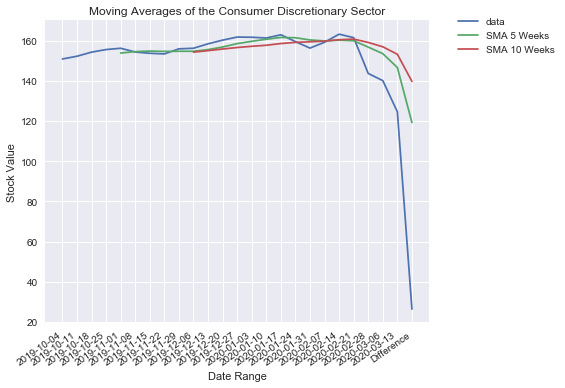

In [79]:
date_range=consumer_df["date_range"]
avg_close=consumer_df["Average Close"]
ma_5=consumer_df["MA_5"]
ma_10=consumer_df["MA_10"]
fig,ax=plt.subplots()
ax.plot(date_range,avg_close, label="data")
ax.plot(date_range, ma_5, label="SMA 5 Weeks")
ax.plot(date_range, ma_10, label="SMA 10 Weeks")
for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(35)
plt.style.use('seaborn')
plt.legend(bbox_to_anchor=(1.05, 1.04))
plt.title("Moving Averages of the Consumer Discretionary Sector")
plt.xlabel("Date Range")
plt.ylabel("Stock Value")
plt.tight_layout()
plt.savefig("movingaverages_consumerdiscretionary.png")
plt.show()

In [17]:
fin_df=stocks_df.loc[stocks_df["Sector"]=="Financials"]
fin_df=fin_df.dropna()
fin_df=fin_df.drop(['Unnamed: 0', 'Sector', 'Symbol'], axis=1)
fin_df=fin_df.rename(columns={'Name': 'date_range'})
fin_df=fin_df.set_index('date_range')
fin_df=fin_df.swapaxes("index", "columns")
fin_df['Average Close'] = fin_df.mean(axis=1)
fin_df['MA_5'] = fin_df["Average Close"].rolling(window=5).mean()
fin_df['MA_10'] = fin_df["Average Close"].rolling(window=10).mean()
fin_df

date_range,Affiliated Managers Group Inc,AFLAC Inc,Allstate Corp,American Express Co,"American International Group, Inc.",Ameriprise Financial,Aon plc,Arthur J. Gallagher & Co.,Assurant Inc.,Bank of America Corp,...,The Travelers Companies Inc.,Torchmark Corp.,U.S. Bancorp,Unum Group,Wells Fargo,Willis Towers Watson,Zions Bancorp,Average Close,MA_5,MA_10
2019-10-04,76.47,52.10,108.46,114.41,54.43,136.19,192.00,89.02,126.79,28.37,...,144.96,94.51,54.09,27.25,49.21,188.65,43.200,92.388333,NaN,NaN
2019-10-11,75.97,52.44,107.93,116.40,54.42,138.27,191.10,87.98,125.78,28.91,...,142.60,94.25,53.47,28.29,49.21,188.10,44.090,92.811905,NaN,NaN
2019-10-18,74.58,52.71,108.41,116.76,53.97,142.00,192.91,89.55,125.67,30.35,...,141.36,94.68,55.07,28.27,49.97,187.77,44.720,93.571905,NaN,NaN
2019-10-25,77.34,53.26,107.24,118.26,52.80,149.45,188.65,89.45,125.57,31.72,...,130.43,96.39,56.74,28.49,51.57,184.98,47.950,94.597302,NaN,NaN
2019-11-01,82.15,53.61,105.90,119.14,53.76,152.89,195.85,91.52,127.70,31.80,...,130.72,98.10,57.58,28.64,52.18,188.99,49.345,96.402143,93.954317,NaN
2019-11-08,86.86,54.14,108.19,121.47,55.91,158.54,194.57,91.15,130.07,33.26,...,133.29,98.93,58.90,30.00,54.10,185.10,51.070,98.492698,95.175190,NaN
2019-11-15,85.00,54.40,111.10,120.76,53.93,160.17,198.71,91.94,132.09,32.93,...,133.57,99.23,59.09,29.70,53.80,188.95,49.550,98.666349,96.346079,NaN
2019-11-22,84.41,53.99,110.04,119.06,53.30,159.77,199.58,91.74,131.82,33.18,...,135.13,100.94,60.05,30.21,54.28,189.76,49.960,98.798889,97.391476,NaN
2019-11-29,85.37,54.84,111.35,120.12,52.66,163.87,203.61,93.27,132.87,33.32,...,136.72,102.76,60.03,30.74,54.46,196.44,49.780,99.663651,98.404746,NaN
2019-12-06,85.43,52.99,111.10,120.61,51.86,164.90,205.99,93.75,131.58,33.67,...,135.72,103.30,60.14,29.27,54.37,195.39,49.710,100.096667,99.143651,96.548984


In [20]:
fin_df=fin_df.reset_index()
fin_df=fin_df.rename(columns={'index': 'date_range'})

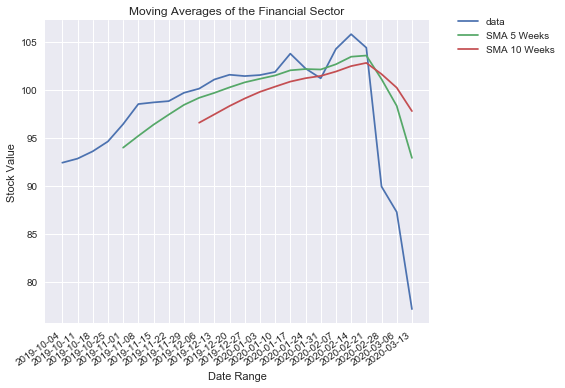

In [59]:
date_range=fin_df["date_range"]
avg_close=fin_df["Average Close"]
ma_5=fin_df["MA_5"]
ma_10=fin_df["MA_10"]
fig,ax=plt.subplots()
ax.plot(date_range,avg_close, label="data")
ax.plot(date_range, ma_5, label="SMA 5 Weeks")
ax.plot(date_range, ma_10, label="SMA 10 Weeks")
for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(35)
plt.style.use('seaborn')
plt.legend(bbox_to_anchor=(1.05, 1.04))
plt.title("Moving Averages of the Financial Sector")
plt.xlabel("Date Range")
plt.ylabel("Stock Value")
plt.tight_layout()
plt.savefig("movingaverages_financial.png")
plt.show()

In [23]:
healthcare_df=stocks_df.loc[stocks_df["Sector"]=="Health Care"]
healthcare_df=healthcare_df.dropna()
healthcare_df=healthcare_df.drop(['Unnamed: 0', 'Sector', 'Symbol'], axis=1)
healthcare_df=healthcare_df.rename(columns={'Name': 'date_range'})
healthcare_df=healthcare_df.set_index('date_range')
healthcare_df=healthcare_df.swapaxes("index", "columns")
healthcare_df['Average Close'] = healthcare_df.mean(axis=1)
healthcare_df['MA_5'] = healthcare_df["Average Close"].rolling(window=5).mean()
healthcare_df['MA_10'] = healthcare_df["Average Close"].rolling(window=10).mean()
healthcare_df       

date_range,Abbott Laboratories,AbbVie Inc.,Agilent Technologies Inc,Alexion Pharmaceuticals,Align Technology,"Allergan, Plc",AmerisourceBergen Corp,Amgen Inc.,Anthem Inc.,Baxter International Inc.,...,United Health Group Inc.,"Universal Health Services, Inc.",Varian Medical Systems,Vertex Pharmaceuticals Inc,Waters Corporation,Zimmer Biomet Holdings,Zoetis,Average Close,MA_5,MA_10
2019-10-04,81.99,74.66,75.88,98.03,181.59,168.44,81.85,195.59,241.79,86.64,...,219.80,146.13,113.82,172.42,227.00,134.45,127.05,155.743909,NaN,NaN
2019-10-11,79.63,73.63,75.30,99.25,200.16,169.09,81.96,200.80,237.55,88.03,...,222.07,146.13,110.82,172.41,213.62,136.44,128.47,155.795818,NaN,NaN
2019-10-18,82.79,76.46,74.57,98.41,213.88,173.60,89.64,202.72,249.40,87.99,...,245.34,146.09,114.62,176.23,215.75,137.61,128.12,159.419000,NaN,NaN
2019-10-25,81.65,76.53,75.39,105.18,243.38,173.84,86.80,203.05,263.07,77.28,...,244.91,137.93,120.30,194.49,218.11,134.07,124.36,160.992273,NaN,NaN
2019-11-01,82.66,81.75,76.97,109.38,257.04,178.29,86.87,217.95,270.75,77.91,...,252.21,138.75,123.30,200.94,215.09,138.22,125.34,165.174000,159.425000,NaN
2019-11-08,83.74,85.21,76.64,110.79,259.92,181.28,86.07,221.11,282.09,78.51,...,256.97,141.13,124.76,201.31,210.08,144.00,117.86,165.438364,161.363891,NaN
2019-11-15,85.71,88.63,78.26,108.37,263.92,183.61,87.30,220.86,297.82,81.44,...,269.40,144.27,128.51,209.80,217.32,146.78,117.92,169.808273,164.166382,NaN
2019-11-22,83.74,86.05,79.12,111.03,274.40,183.79,90.26,230.74,291.83,82.02,...,276.84,139.32,131.58,218.00,218.72,143.82,119.81,171.283818,166.539345,NaN
2019-11-29,85.45,87.73,80.77,113.94,277.34,184.94,87.91,234.72,288.66,81.97,...,279.87,139.49,133.73,221.75,222.07,145.28,120.52,173.360545,169.013000,NaN
2019-12-06,85.48,86.98,82.21,113.89,275.72,186.37,88.24,233.77,285.27,83.17,...,280.19,144.71,138.51,223.25,226.30,148.53,121.72,175.027636,170.983727,165.204364


In [24]:
healthcare_df=healthcare_df.reset_index()
healthcare_df=healthcare_df.rename(columns={'index': 'date_range'})

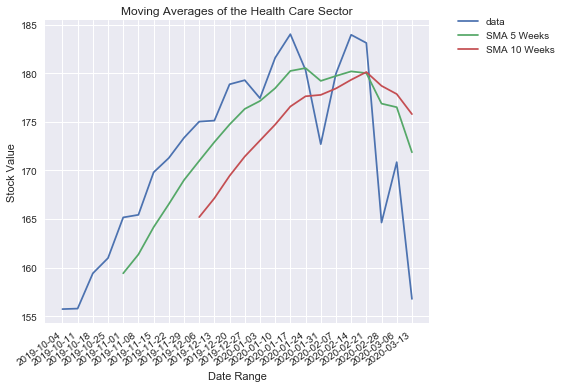

In [25]:
date_range=healthcare_df["date_range"]
avg_close=healthcare_df["Average Close"]
ma_5=healthcare_df["MA_5"]
ma_10=healthcare_df["MA_10"]
fig,ax=plt.subplots()
ax.plot(date_range,avg_close, label="data")
ax.plot(date_range, ma_5, label="SMA 5 Weeks")
ax.plot(date_range, ma_10, label="SMA 10 Weeks")
for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(35)
plt.style.use('seaborn')
plt.legend(bbox_to_anchor=(1.05, 1.04))
plt.title("Moving Averages of the Health Care Sector")
plt.xlabel("Date Range")
plt.ylabel("Stock Value")
plt.tight_layout()
plt.savefig("movingaverages_healthcare.png")
plt.show()

In [19]:
industrials_df=stocks_df.loc[stocks_df["Sector"]=="Industrials"]
industrials_df=industrials_df.dropna()
industrials_df=industrials_df.drop(['Unnamed: 0', 'Sector', 'Symbol'], axis=1)
industrials_df=industrials_df.rename(columns={'Name': 'date_range'})
industrials_df=industrials_df.set_index('date_range')
industrials_df=industrials_df.swapaxes("index", "columns")
industrials_df['Average Close'] = industrials_df.mean(axis=1)
industrials_df['MA_5'] = industrials_df["Average Close"].rolling(window=5).mean()
industrials_df['MA_10'] = industrials_df["Average Close"].rolling(window=10).mean()
industrials_df

date_range,3M Company,A.O. Smith Corp,Acuity Brands Inc,Alaska Air Group Inc,Allegion,American Airlines Group,AMETEK Inc.,Arconic Inc.,Boeing Company,C. H. Robinson Worldwide,...,United Continental Holdings,United Parcel Service,"United Rentals, Inc.",United Technologies,Verisk Analytics,Waste Management Inc.,Xylem Inc.,Average Close,MA_5,MA_10
2019-10-04,155.82,45.51,121.15,63.51,103.32,25.830,88.83,24.49,375.70,83.290,...,84.290,117.49,117.21,133.21,157.535,116.61,75.97,123.872109,NaN,NaN
2019-10-11,158.10,47.99,122.02,66.08,101.46,27.355,88.51,26.45,374.92,85.250,...,87.150,116.02,118.40,136.15,157.110,116.34,77.63,125.941797,NaN,NaN
2019-10-18,163.10,51.01,122.93,66.84,103.95,28.220,88.35,27.01,344.00,86.555,...,90.085,117.35,128.66,136.80,154.420,117.05,79.78,126.794375,NaN,NaN
2019-10-25,166.09,51.07,124.90,71.57,113.33,30.860,89.96,27.64,339.83,90.110,...,91.640,115.72,135.38,142.96,148.920,111.35,83.30,129.086953,NaN,NaN
2019-11-01,170.09,50.28,125.99,70.15,118.19,30.560,94.20,28.54,345.19,74.700,...,91.650,119.51,141.86,146.68,145.360,111.23,79.12,130.892656,127.317578,NaN
2019-11-08,173.15,52.08,128.08,71.17,115.65,30.760,96.54,28.97,351.00,78.060,...,93.440,124.30,155.32,148.88,136.750,111.03,77.33,132.775625,129.098281,NaN
2019-11-15,171.88,50.78,128.38,70.38,119.12,28.860,98.17,30.86,371.68,74.720,...,92.510,123.73,154.34,149.36,141.180,112.16,77.55,133.845000,130.678922,NaN
2019-11-22,167.60,48.20,127.31,68.76,119.05,28.680,97.90,30.55,371.34,75.590,...,91.780,119.32,154.51,147.70,145.980,110.77,76.89,133.004609,131.920969,NaN
2019-11-29,169.77,48.40,130.78,69.01,120.03,28.740,99.01,30.96,366.18,76.850,...,92.800,119.73,153.05,148.34,147.480,112.91,77.51,133.615938,132.826766,NaN
2019-12-06,171.47,46.79,133.80,68.32,122.99,27.725,98.55,31.02,354.09,76.020,...,88.580,117.53,157.26,146.99,146.820,111.62,75.32,132.783203,133.204875,130.261227


In [26]:
industrials_df=industrials_df.reset_index()
industrials_df=industrials_df.rename(columns={'index': 'date_range'})

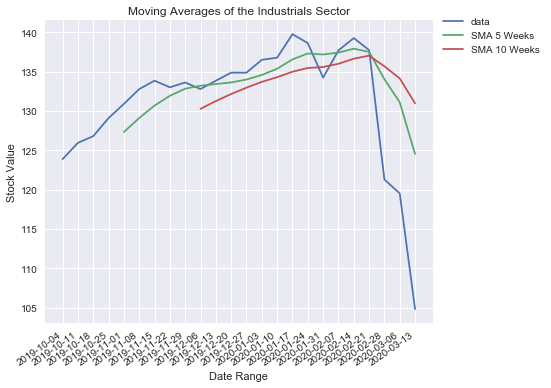

In [61]:
date_range=industrials_df["date_range"]
avg_close=industrials_df["Average Close"]
ma_5=industrials_df["MA_5"]
ma_10=industrials_df["MA_10"]
fig,ax=plt.subplots()
ax.plot(date_range,avg_close, label="data")
ax.plot(date_range, ma_5, label="SMA 5 Weeks")
ax.plot(date_range, ma_10, label="SMA 10 Weeks")
for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(35)
plt.style.use('seaborn')
plt.legend(bbox_to_anchor=(1.3, 1.04))
plt.title("Moving Averages of the Industrials Sector")
plt.xlabel("Date Range")
plt.ylabel("Stock Value")
plt.tight_layout()
plt.savefig("movingaverages_industrials.png")
plt.show()

In [28]:
it_df=stocks_df.loc[stocks_df["Sector"]=="Information Technology"]
it_df=it_df.dropna()
it_df=it_df.drop(['Unnamed: 0', 'Sector', 'Symbol'], axis=1)
it_df=it_df.rename(columns={'Name': 'date_range'})
it_df=it_df.set_index('date_range')
it_df=it_df.swapaxes("index", "columns")
it_df['Average Close'] = it_df.mean(axis=1)
it_df['MA_5'] = it_df["Average Close"].rolling(window=5).mean()
it_df['MA_10'] = it_df["Average Close"].rolling(window=10).mean()
it_df   

date_range,Accenture plc,Activision Blizzard,Adobe Systems Inc,Advanced Micro Devices Inc,Akamai Technologies Inc,Alliance Data Systems,Alphabet Inc Class A,Alphabet Inc Class C,Amphenol Corp,"Analog Devices, Inc.",...,Texas Instruments,Verisign Inc.,Visa Inc.,Western Digital,Western Union Co,Xerox Corp.,Xilinx Inc,Average Close,MA_5,MA_10
2019-10-04,189.64,55.440,276.96,29.010,90.91,123.88,1210.96,1209.00,96.14,113.03,...,130.14,184.34,175.98,58.57,23.31,29.59,94.24,147.868881,NaN,NaN
2019-10-11,184.97,54.820,278.29,29.750,89.55,122.55,1215.71,1215.45,96.98,111.22,...,130.09,186.49,177.06,58.35,23.73,29.41,96.22,149.027015,NaN,NaN
2019-10-18,187.08,54.540,265.52,30.970,91.51,123.54,1244.41,1245.49,99.00,109.48,...,129.46,185.51,175.71,58.13,24.03,29.80,94.34,148.894179,NaN,NaN
2019-10-25,183.07,55.260,270.98,32.710,89.15,104.80,1264.30,1265.13,100.23,106.83,...,120.51,190.16,177.85,61.23,24.82,30.51,94.90,151.500522,NaN,NaN
2019-11-01,188.22,55.820,277.82,34.890,87.50,101.06,1272.25,1273.74,102.78,109.37,...,118.04,188.07,180.93,53.83,26.48,33.48,92.71,153.646119,150.187343,NaN
2019-11-08,189.70,54.300,292.46,36.290,84.53,107.90,1309.00,1311.37,102.70,113.02,...,120.11,183.79,178.97,52.02,27.87,38.85,95.50,156.361791,151.885925,NaN
2019-11-15,196.81,53.440,297.50,38.560,87.71,103.45,1333.54,1334.87,102.25,113.40,...,118.00,186.81,179.77,50.34,26.80,38.94,93.66,158.810746,153.842672,NaN
2019-11-22,196.66,53.040,299.30,39.150,87.97,104.41,1293.67,1295.34,101.74,110.65,...,117.01,188.44,179.47,48.46,27.00,39.06,90.61,156.718358,155.407507,NaN
2019-11-29,201.16,54.830,309.53,39.150,87.12,106.91,1304.09,1304.96,104.00,112.95,...,120.21,190.74,184.51,50.33,26.88,38.93,92.78,159.281045,156.963612,NaN
2019-12-06,202.55,55.210,306.23,39.630,85.25,105.26,1339.39,1340.62,104.03,115.89,...,122.37,188.26,182.17,49.08,26.86,37.77,91.86,159.450448,158.124478,154.155910


In [29]:
it_df=it_df.reset_index()
it_df=it_df.rename(columns={'index': 'date_range'})

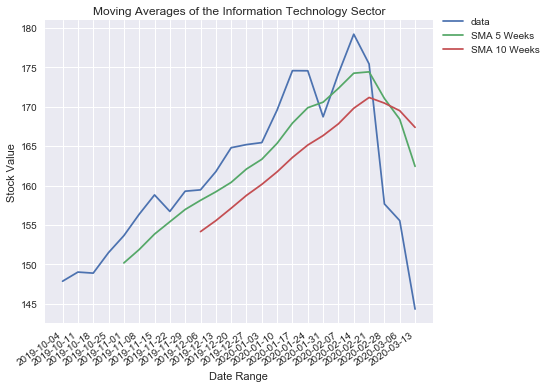

In [62]:
date_range=it_df["date_range"]
avg_close=it_df["Average Close"]
ma_5=it_df["MA_5"]
ma_10=it_df["MA_10"]
fig,ax=plt.subplots()
ax.plot(date_range,avg_close, label="data")
ax.plot(date_range, ma_5, label="SMA 5 Weeks")
ax.plot(date_range, ma_10, label="SMA 10 Weeks")
for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(35)
plt.style.use('seaborn')
plt.legend(bbox_to_anchor=(1.3, 1.04))
plt.title("Moving Averages of the Information Technology Sector")
plt.xlabel("Date Range")
plt.ylabel("Stock Value")
plt.tight_layout()
plt.savefig("movingaverages_it.png")
plt.show()

In [31]:
materials_df=stocks_df.loc[stocks_df["Sector"]=="Materials"]
materials_df=materials_df.dropna()
materials_df=materials_df.drop(['Unnamed: 0', 'Sector', 'Symbol'], axis=1)
materials_df=materials_df.rename(columns={'Name': 'date_range'})
materials_df=materials_df.set_index('date_range')
materials_df=materials_df.swapaxes("index", "columns")
materials_df['Average Close'] = materials_df.mean(axis=1)
materials_df['MA_5'] = materials_df["Average Close"].rolling(window=5).mean()
materials_df['MA_10'] = materials_df["Average Close"].rolling(window=10).mean()
materials_df  

date_range,Air Products & Chemicals Inc,Albemarle Corp,Avery Dennison Corp,Ball Corp,CF Industries Holdings Inc,Eastman Chemical,Ecolab Inc.,FMC Corporation,Freeport-McMoRan Inc.,International Paper,...,Packaging Corporation of America,PPG Industries,Sealed Air,Sherwin-Williams,The Mosaic Company,Vulcan Materials,WestRock Company,Average Close,MA_5,MA_10
2019-10-04,213.88,66.32,111.36,72.73,48.78,71.07,194.62,82.19,8.83,39.18,...,103.33,116.62,40.25,548.84,19.39,147.07,34.07,112.417273,NaN,NaN
2019-10-11,217.29,68.91,113.37,72.61,50.62,72.61,194.74,83.75,9.55,41.56,...,109.32,119.17,40.71,550.01,20.72,147.44,36.57,114.131818,NaN,NaN
2019-10-18,214.88,67.13,116.89,74.11,47.77,73.09,193.82,83.01,9.58,42.26,...,108.22,124.23,41.45,560.86,19.55,146.04,36.70,114.520000,NaN,NaN
2019-10-25,213.26,63.59,126.80,71.91,46.14,76.28,191.94,83.98,10.14,43.00,...,110.93,124.04,41.87,574.93,20.54,147.08,38.01,116.207273,NaN,NaN
2019-11-01,213.56,64.49,129.40,68.36,46.27,78.97,190.98,95.01,10.52,43.96,...,111.31,125.44,42.20,579.64,20.66,143.65,38.80,117.130455,114.881364,NaN
2019-11-08,233.87,67.98,133.83,64.65,46.63,83.90,190.39,97.70,11.52,46.21,...,113.90,128.92,40.02,581.35,20.81,136.44,39.75,118.960909,116.190091,NaN
2019-11-15,240.92,66.14,132.08,65.60,45.93,79.67,191.74,97.00,11.16,45.65,...,112.65,129.50,38.01,592.77,19.75,140.52,39.96,119.634545,117.290636,NaN
2019-11-22,237.60,64.90,129.26,65.73,44.95,77.59,182.51,97.23,11.35,45.12,...,110.87,125.41,36.75,574.83,18.16,138.47,38.81,117.525455,117.891727,NaN
2019-11-29,236.33,65.38,130.37,66.06,46.21,78.37,186.67,97.96,11.38,46.34,...,111.90,128.84,37.73,583.13,19.05,141.87,40.33,119.311364,118.512545,NaN
2019-12-06,232.03,64.30,130.14,63.55,45.34,77.50,186.41,98.42,11.64,47.26,...,113.29,132.54,38.71,578.54,19.08,143.50,41.23,119.506818,118.987818,116.934591


In [32]:
materials_df=materials_df.reset_index()
materials_df=materials_df.rename(columns={'index': 'date_range'})

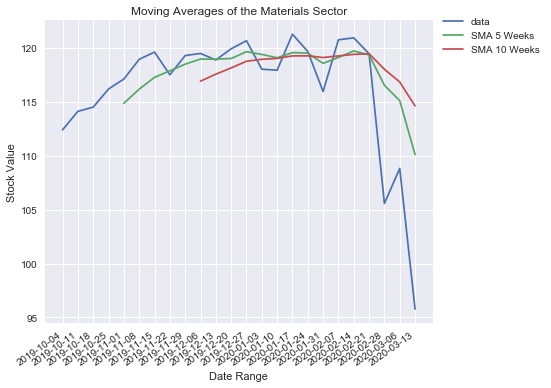

In [63]:
date_range=materials_df["date_range"]
avg_close=materials_df["Average Close"]
ma_5=materials_df["MA_5"]
ma_10=materials_df["MA_10"]
fig,ax=plt.subplots()
ax.plot(date_range,avg_close, label="data")
ax.plot(date_range, ma_5, label="SMA 5 Weeks")
ax.plot(date_range, ma_10, label="SMA 10 Weeks")
for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(35)
plt.style.use('seaborn')
plt.legend(bbox_to_anchor=(1.3, 1.04))
plt.title("Moving Averages of the Materials Sector")
plt.xlabel("Date Range")
plt.ylabel("Stock Value")
plt.tight_layout()
plt.savefig("movingaverages_materials.png")
plt.show()

In [39]:
realestate_df=stocks_df.loc[stocks_df["Sector"]=="Real Estate"]
realestate_df=realestate_df.dropna()
realestate_df=realestate_df.drop(['Unnamed: 0', 'Sector', 'Symbol'], axis=1)
realestate_df=realestate_df.rename(columns={'Name': 'date_range'})
realestate_df=realestate_df.set_index('date_range')
realestate_df=realestate_df.swapaxes("index", "columns")
realestate_df['Average Close'] = realestate_df.mean(axis=1)
realestate_df['MA_5'] = realestate_df["Average Close"].rolling(window=5).mean()
realestate_df['MA_10'] = realestate_df["Average Close"].rolling(window=10).mean()
realestate_df  

date_range,Alexandria Real Estate Equities Inc,American Tower Corp A,Apartment Investment & Management,"AvalonBay Communities, Inc.",Boston Properties,CBRE Group,Crown Castle International Corp.,Digital Realty Trust Inc,Duke Realty Corp,Equinix,...,Simon Property Group Inc,SL Green Realty,UDR Inc,Ventas Inc,Vornado Realty Trust,Welltower Inc.,Weyerhaeuser Corp.,Average Close,MA_5,MA_10
2019-10-04,154.80,225.93,53.32,219.00,128.71,50.67,137.92,130.27,34.26,581.65,...,148.00,80.47,49.03,74.56,64.04,91.96,27.02,122.095312,NaN,NaN
2019-10-11,153.97,224.45,53.55,218.08,128.20,51.82,136.68,129.31,33.55,566.61,...,148.60,80.26,48.01,72.13,62.64,91.18,27.13,121.188750,NaN,NaN
2019-10-18,156.01,229.09,54.48,220.17,128.36,52.21,144.06,132.98,33.97,576.41,...,149.92,80.44,49.80,72.86,62.42,92.09,28.28,122.807813,NaN,NaN
2019-10-25,158.25,216.67,54.29,219.41,132.18,52.61,141.00,132.82,34.56,565.74,...,155.56,82.85,49.42,66.00,64.28,87.96,29.06,121.790313,NaN,NaN
2019-11-01,158.42,215.52,55.23,217.24,137.44,54.79,137.42,126.80,35.34,562.24,...,154.10,84.10,49.73,64.03,64.97,90.03,29.99,120.881562,121.752750,NaN
2019-11-08,153.91,205.87,53.17,209.85,138.34,54.89,130.81,116.57,34.59,530.31,...,154.49,86.00,47.37,59.54,65.77,82.88,29.63,116.390625,120.611812,NaN
2019-11-15,158.76,213.37,54.22,214.53,137.56,56.44,134.68,118.87,35.15,550.41,...,154.00,85.99,48.44,58.30,65.39,83.99,29.35,118.725000,120.119063,NaN
2019-11-22,159.67,210.11,53.23,211.28,137.59,54.91,132.32,119.60,34.63,557.58,...,147.70,83.95,47.57,57.41,63.09,83.65,28.99,117.303750,119.018250,NaN
2019-11-29,162.52,214.03,53.77,214.41,138.54,57.02,133.66,120.95,35.18,566.85,...,151.21,85.33,48.05,58.31,64.57,84.57,29.51,118.856250,118.431438,NaN
2019-12-06,161.94,212.20,52.61,215.94,139.28,58.50,135.46,118.37,35.17,559.19,...,148.24,86.90,47.89,57.47,65.56,83.77,29.51,118.557187,117.966563,119.859656


In [40]:
realestate_df=realestate_df.reset_index()
realestate_df=realestate_df.rename(columns={'index': 'date_range'})

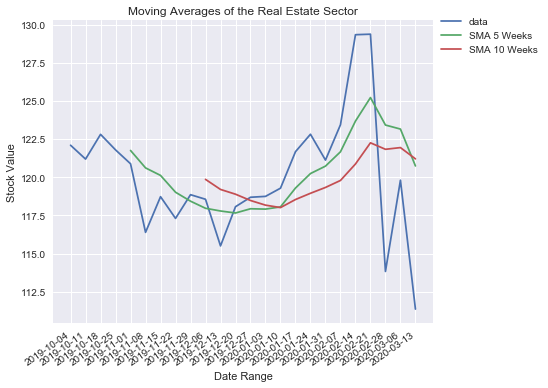

In [64]:
date_range=realestate_df["date_range"]
avg_close=realestate_df["Average Close"]
ma_5=realestate_df["MA_5"]
ma_10=realestate_df["MA_10"]
fig,ax=plt.subplots()
ax.plot(date_range,avg_close, label="data")
ax.plot(date_range, ma_5, label="SMA 5 Weeks")
ax.plot(date_range, ma_10, label="SMA 10 Weeks")
for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(35)
plt.style.use('seaborn')
plt.legend(bbox_to_anchor=(1.3, 1.04))
plt.title("Moving Averages of the Real Estate Sector")
plt.xlabel("Date Range")
plt.ylabel("Stock Value")
plt.tight_layout()
plt.savefig("movingaverages_realestate.png")
plt.show()

In [42]:
utilities_df=stocks_df.loc[stocks_df["Sector"]=="Utilities"]
utilities_df=utilities_df.dropna()
utilities_df=utilities_df.drop(['Unnamed: 0', 'Sector', 'Symbol'], axis=1)
utilities_df=utilities_df.rename(columns={'Name': 'date_range'})
utilities_df=utilities_df.set_index('date_range')
utilities_df=utilities_df.swapaxes("index", "columns")
utilities_df['Average Close'] = utilities_df.mean(axis=1)
utilities_df['MA_5'] = utilities_df["Average Close"].rolling(window=5).mean()
utilities_df['MA_10'] = utilities_df["Average Close"].rolling(window=10).mean()
utilities_df  

date_range,AES Corp,Alliant Energy Corp,Ameren Corp,American Electric Power,American Water Works Company Inc,CenterPoint Energy,CMS Energy,Consolidated Edison,Dominion Energy,DTE Energy Co.,...,Pinnacle West Capital,PPL Corp.,Public Serv. Enterprise Inc.,Sempra Energy,Southern Co.,Wec Energy Group Inc,Xcel Energy Inc,Average Close,MA_5,MA_10
2019-10-04,16.03,54.350,79.53,93.61,125.78,29.25,64.92,94.14,81.70,132.24,...,97.23,30.93,62.28,147.23,62.05,96.08,64.630,81.083846,NaN,NaN
2019-10-11,16.01,53.025,77.05,92.34,123.69,28.27,63.88,92.22,81.90,129.89,...,95.46,31.43,62.35,145.49,61.52,93.81,63.330,79.808654,NaN,NaN
2019-10-18,16.38,52.980,76.62,94.14,122.41,28.64,64.01,91.49,82.16,127.34,...,93.91,32.03,62.29,146.23,61.14,92.96,64.010,79.692885,NaN,NaN
2019-10-25,16.80,53.180,76.59,94.35,121.11,29.54,63.65,93.32,81.89,128.21,...,94.20,33.22,62.90,143.97,61.35,93.79,63.640,79.938462,NaN,NaN
2019-11-01,17.51,53.030,77.36,93.56,122.78,29.02,63.34,91.12,83.27,127.00,...,93.49,33.59,62.99,147.29,62.26,93.53,63.100,79.784615,80.061692,NaN
2019-11-08,17.64,51.680,73.81,89.07,116.30,28.78,59.61,87.92,80.28,120.49,...,86.39,33.72,61.43,142.12,61.26,87.83,60.080,76.430769,79.131077,NaN
2019-11-15,18.45,52.880,76.62,89.56,118.24,25.48,60.90,87.73,82.11,123.84,...,87.61,33.91,60.89,146.13,62.20,88.07,60.870,77.766538,78.722654,NaN
2019-11-22,18.83,53.390,74.95,91.54,119.04,24.75,61.76,86.19,83.24,123.44,...,87.20,33.82,60.40,146.60,62.89,88.53,61.260,77.886538,78.361385,NaN
2019-11-29,18.91,53.000,74.33,91.35,121.03,24.56,61.30,86.89,83.11,124.94,...,87.39,34.03,59.31,147.27,61.99,88.65,61.490,77.997692,77.973231,NaN
2019-12-06,18.72,53.110,75.19,92.39,122.67,25.02,61.46,86.79,81.00,125.23,...,86.20,34.37,58.61,145.84,62.14,89.07,62.000,78.197308,77.655769,78.858731


In [43]:
utilities_df=utilities_df.reset_index()
utilities_df=utilities_df.rename(columns={'index': 'date_range'})

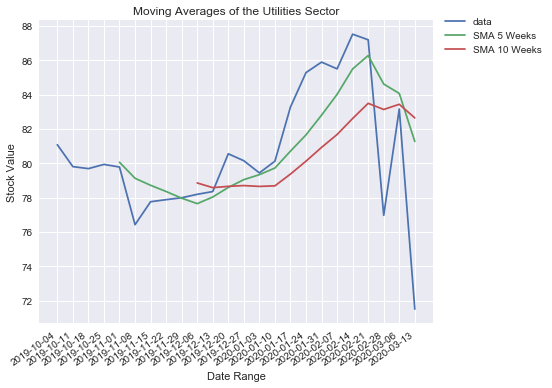

In [65]:
date_range=utilities_df["date_range"]
avg_close=utilities_df["Average Close"]
ma_5=utilities_df["MA_5"]
ma_10=utilities_df["MA_10"]
fig,ax=plt.subplots()
ax.plot(date_range,avg_close, label="data")
ax.plot(date_range, ma_5, label="SMA 5 Weeks")
ax.plot(date_range, ma_10, label="SMA 10 Weeks")
for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(35)
plt.style.use('seaborn')
plt.legend(bbox_to_anchor=(1.3, 1.04))
plt.title("Moving Averages of the Utilities Sector")
plt.xlabel("Date Range")
plt.ylabel("Stock Value")
plt.tight_layout()
plt.savefig("movingaverages_utilities.png")
plt.show()

In [16]:
cons_staple_df=stocks_df.loc[stocks_df["Sector"]=="Consumer Staples"]
cons_staple_df=cons_staple_df.dropna()
cons_staple_df=cons_staple_df.drop(['Unnamed: 0', 'Sector', 'Symbol'], axis=1)
cons_staple_df=cons_staple_df.rename(columns={'Name': 'date_range'})
cons_staple_df=cons_staple_df.set_index('date_range')
cons_staple_df=cons_staple_df.swapaxes("index", "columns")
cons_staple_df['Average Close'] = cons_staple_df.mean(axis=1)
cons_staple_df['MA_5'] = cons_staple_df["Average Close"].rolling(window=5).mean()
cons_staple_df['MA_10'] = cons_staple_df["Average Close"].rolling(window=10).mean()
cons_staple_df   

date_range,Altria Group Inc,Archer-Daniels-Midland Co,Campbell Soup,Church & Dwight,Coca-Cola Company (The),Colgate-Palmolive,Conagra Brands,Constellation Brands,Costco Wholesale Corp.,"Coty, Inc",...,Procter & Gamble,Sysco Corp.,The Clorox Company,The Hershey Company,Tyson Foods,Wal-Mart Stores,Walgreens Boots Alliance,Average Close,MA_5,MA_10
2019-10-04,41.65,40.35,47.34,76.05,54.54,72.07,28.86,193.74,291.670,10.33,...,124.00,78.15,151.38,157.51,82.25,118.16,52.97,92.192167,NaN,NaN
2019-10-11,42.57,40.46,46.87,74.12,53.30,70.51,28.41,193.08,297.600,10.57,...,121.09,78.87,150.25,155.31,83.60,120.24,53.99,91.533667,NaN,NaN
2019-10-18,44.33,39.64,47.56,73.89,54.78,68.03,27.15,197.02,302.860,10.12,...,117.47,79.14,149.70,153.07,82.42,119.14,55.30,91.195833,NaN,NaN
2019-10-25,46.80,41.01,46.46,74.89,53.75,68.41,26.92,195.84,296.500,11.76,...,123.25,79.17,151.40,143.31,78.48,119.04,55.42,90.782000,NaN,NaN
2019-11-01,45.06,42.43,46.54,68.78,53.90,66.81,27.47,191.00,296.090,11.67,...,123.87,81.28,147.04,143.07,83.70,117.62,57.38,90.512667,91.243267,NaN
2019-11-08,46.41,43.31,46.25,67.58,52.21,66.63,27.44,187.56,302.620,12.84,...,119.70,80.40,148.00,140.97,82.63,119.44,59.24,90.793333,90.963500,NaN
2019-11-15,47.97,42.87,47.28,67.36,52.67,66.37,28.81,179.65,303.660,11.91,...,120.54,81.61,145.30,145.75,90.33,118.87,62.14,91.333333,90.923433,NaN
2019-11-22,49.00,42.72,46.83,68.84,53.03,66.71,28.73,181.22,299.310,11.53,...,120.29,79.06,146.26,146.84,86.41,119.36,60.60,91.538333,90.991933,NaN
2019-11-29,49.70,42.93,46.57,70.24,53.40,67.82,28.87,186.06,299.810,11.54,...,122.06,80.55,148.23,148.16,89.89,119.09,59.60,92.429333,91.321400,NaN
2019-12-06,50.41,43.91,47.75,70.25,54.42,68.24,28.90,183.65,294.945,11.87,...,124.19,82.77,151.86,149.25,89.45,119.78,58.63,93.057833,91.830433,91.536850


In [17]:
cons_staple_df=cons_staple_df.reset_index()
cons_staple_df=cons_staple_df.rename(columns={'index': 'date_range'})

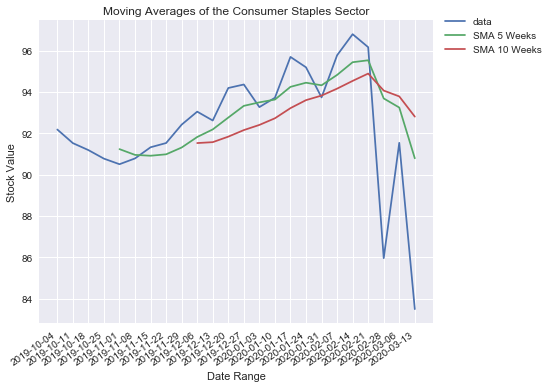

In [19]:
date_range=cons_staple_df["date_range"]
avg_close=cons_staple_df["Average Close"]
ma_5=cons_staple_df["MA_5"]
ma_10=cons_staple_df["MA_10"]
fig,ax=plt.subplots()
ax.plot(date_range,avg_close, label="data")
ax.plot(date_range, ma_5, label="SMA 5 Weeks")
ax.plot(date_range, ma_10, label="SMA 10 Weeks")
for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(35)
plt.style.use('seaborn')
plt.legend(bbox_to_anchor=(1.3, 1.04))
plt.title("Moving Averages of the Consumer Staples Sector")
plt.xlabel("Date Range")
plt.ylabel("Stock Value")
plt.tight_layout()
plt.savefig("movingaverages_consumerstaples.png")
plt.show()

In [20]:
energy_df=stocks_df.loc[stocks_df["Sector"]=="Energy"]
energy_df=energy_df.dropna()
energy_df=energy_df.drop(['Unnamed: 0', 'Sector', 'Symbol'], axis=1)
energy_df=energy_df.rename(columns={'Name': 'date_range'})
energy_df=energy_df.set_index('date_range')
energy_df=energy_df.swapaxes("index", "columns")
energy_df['Average Close'] = energy_df.mean(axis=1)
energy_df['MA_5'] = energy_df["Average Close"].rolling(window=5).mean()
energy_df['MA_10'] = energy_df["Average Close"].rolling(window=10).mean()
energy_df   

date_range,Apache Corporation,"Baker Hughes, a GE Company",Cabot Oil & Gas,Chevron Corp.,Cimarex Energy,Concho Resources,ConocoPhillips,Devon Energy Corp.,EOG Resources,EQT Corporation,...,Phillips 66,Pioneer Natural Resources,Range Resources Corp.,Schlumberger Ltd.,TechnipFMC,Valero Energy,Williams Cos.,Average Close,MA_5,MA_10
2019-10-04,22.16,22.47,17.98,113.85,46.63,64.60,53.50,22.60,70.92,9.90,...,100.86,125.45,3.66,31.88,23.13,84.52,23.65,46.462593,NaN,NaN
2019-10-11,21.42,22.23,17.56,116.15,45.32,65.74,56.43,21.26,69.25,9.66,...,106.53,132.51,3.59,32.48,23.47,88.00,23.09,47.197778,NaN,NaN
2019-10-18,22.44,21.77,17.95,114.74,41.33,62.45,53.95,19.80,64.44,9.71,...,107.20,123.36,3.68,32.31,22.90,91.06,22.91,46.100741,NaN,NaN
2019-10-25,22.07,22.38,18.81,118.67,45.99,65.82,56.35,21.47,72.48,9.49,...,114.42,129.83,4.22,35.09,21.36,99.27,23.24,48.623333,NaN,NaN
2019-11-01,23.81,21.90,18.43,116.21,43.98,69.30,57.15,21.17,71.15,10.56,...,118.40,127.56,4.25,34.44,20.51,99.86,22.89,48.590000,47.394889,NaN
2019-11-08,24.43,22.25,18.37,120.93,46.54,72.75,59.16,22.91,74.70,11.59,...,119.70,134.99,4.67,36.34,20.60,100.86,22.09,49.938148,48.090000,NaN
2019-11-15,23.91,22.69,18.17,120.64,46.86,73.16,58.25,22.56,73.48,10.35,...,118.36,134.28,4.23,35.36,20.29,100.61,22.36,49.339259,48.518296,NaN
2019-11-22,23.41,22.42,16.39,118.63,46.69,73.35,59.90,22.77,72.99,9.06,...,116.63,129.56,3.84,36.61,19.23,97.51,23.10,48.618148,49.021778,NaN
2019-11-29,22.28,22.42,15.94,117.13,45.97,72.56,59.94,21.89,70.90,8.73,...,114.72,127.84,3.49,36.20,18.84,95.49,22.72,47.780741,48.853259,NaN
2019-12-06,19.99,22.21,16.08,118.01,47.84,76.50,61.97,23.14,73.96,8.78,...,113.56,133.90,3.85,36.89,19.00,93.61,22.39,48.567407,48.848741,48.121815


In [21]:
energy_df=energy_df.reset_index()
energy_df=energy_df.rename(columns={'index': 'date_range'})

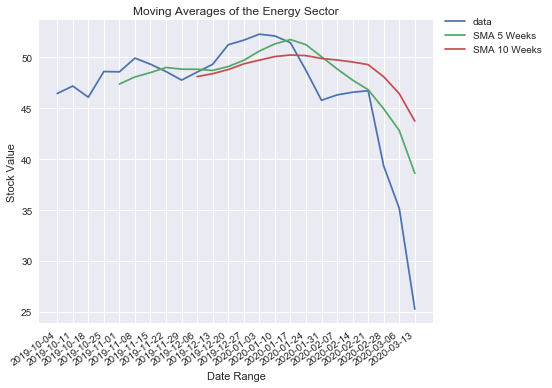

In [22]:
date_range=energy_df["date_range"]
avg_close=energy_df["Average Close"]
ma_5=energy_df["MA_5"]
ma_10=energy_df["MA_10"]
fig,ax=plt.subplots()
ax.plot(date_range,avg_close, label="data")
ax.plot(date_range, ma_5, label="SMA 5 Weeks")
ax.plot(date_range, ma_10, label="SMA 10 Weeks")
for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(35)
plt.style.use('seaborn')
plt.legend(bbox_to_anchor=(1.3, 1.04))
plt.title("Moving Averages of the Energy Sector")
plt.xlabel("Date Range")
plt.ylabel("Stock Value")
plt.tight_layout()
plt.savefig("movingaverages_energy.png")
plt.show()

In [23]:
telecom_df=stocks_df.loc[stocks_df["Sector"]=="Telecommunication Services"]
telecom_df=telecom_df.dropna()
telecom_df=telecom_df.drop(['Unnamed: 0', 'Sector', 'Symbol'], axis=1)
telecom_df=telecom_df.rename(columns={'Name': 'date_range'})
telecom_df=telecom_df.set_index('date_range')
telecom_df=telecom_df.swapaxes("index", "columns")
telecom_df['Average Close'] = telecom_df.mean(axis=1)
telecom_df['MA_5'] = telecom_df["Average Close"].rolling(window=5).mean()
telecom_df['MA_10'] = telecom_df["Average Close"].rolling(window=10).mean()
telecom_df

date_range,AT&T Inc.,CenturyLink Inc,Verizon Communications,Average Close,MA_5,MA_10
2019-10-04,37.51,11.54,59.90,36.316667,NaN,NaN
2019-10-11,37.58,11.73,59.93,36.413333,NaN,NaN
2019-10-18,38.47,12.44,61.05,37.320000,NaN,NaN
2019-10-25,36.91,12.89,60.37,36.723333,NaN,NaN
2019-11-01,38.95,13.32,60.37,37.546667,36.864000,NaN
2019-11-08,39.38,14.79,59.35,37.840000,37.168667,NaN
2019-11-15,39.50,14.97,59.51,37.993333,37.484667,NaN
2019-11-22,37.75,14.97,59.75,37.490000,37.518667,NaN
2019-11-29,37.38,14.49,60.24,37.370000,37.648000,NaN
2019-12-06,38.20,14.16,61.19,37.850000,37.708667,37.286333


In [24]:
telecom_df=telecom_df.reset_index()
telecom_df=telecom_df.rename(columns={'index': 'date_range'})

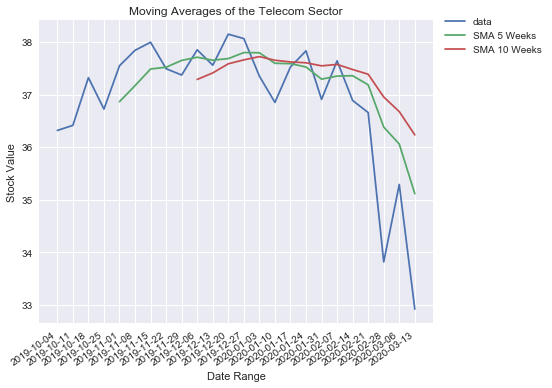

In [25]:
date_range=telecom_df["date_range"]
avg_close=telecom_df["Average Close"]
ma_5=telecom_df["MA_5"]
ma_10=telecom_df["MA_10"]
fig,ax=plt.subplots()
ax.plot(date_range,avg_close, label="data")
ax.plot(date_range, ma_5, label="SMA 5 Weeks")
ax.plot(date_range, ma_10, label="SMA 10 Weeks")
for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(35)
plt.style.use('seaborn')
plt.legend(bbox_to_anchor=(1.3, 1.04))
plt.title("Moving Averages of the Telecom Sector")
plt.xlabel("Date Range")
plt.ylabel("Stock Value")
plt.tight_layout()
plt.savefig("movingaverages_telecom.png")
plt.show()